### Homework

Lakukan pengujian hipotesis untuk
membuktikan apakah education berpengaruh terhadap
income atau tidak?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

#### Data Preparation

In [2]:
mc = pd.read_csv('marketing_campaign.csv', sep='\t') # read data

In [3]:
mc.head() # show top 5 data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


The Data have 29 columns and divide into 4 groups: people, product, promotion, dan place.

Because this homework will focus on the comparison between Education and Income columns (in segment People), I decide to remove other columns except for People

In [5]:
mc2 = mc.iloc[:, 0:10] # only show columns ke 1 - 10

In [6]:
mc2.info() # the metadata of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
 7   Dt_Customer     2240 non-null   object 
 8   Recency         2240 non-null   int64  
 9   MntWines        2240 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 175.1+ KB


In [7]:
mc2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000


In [39]:
mc2['Education'].unique() # to find unique value from columns

array([3, 1, 2, 5, 4])

In [40]:
mc2.shape

(2240, 10)

<AxesSubplot:xlabel='Education', ylabel='count'>

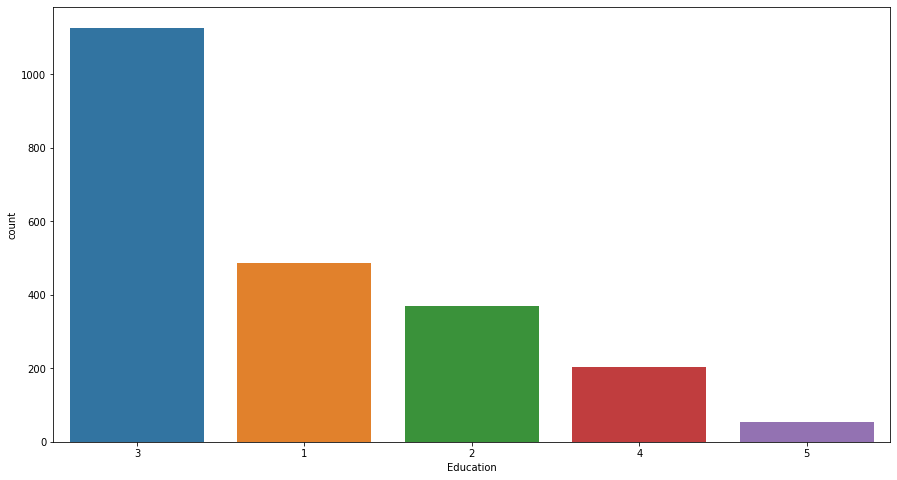

In [41]:
#visualize Education columns (to show this categorical data, I use bar chart)
plt.figure(figsize= (15,8))
sns.countplot(x= mc2['Education'], order= mc2['Education'].value_counts().index)

<AxesSubplot:xlabel='Education', ylabel='Income'>

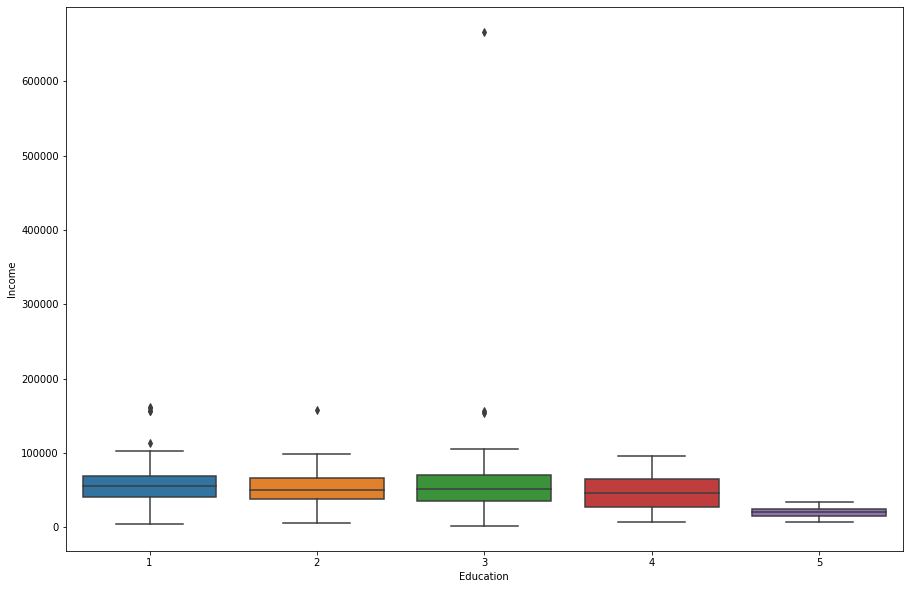

In [42]:
plt.figure(figsize= (15,10))
sns.boxplot(x = mc2['Education'], y= mc2['Income'])

#There is outlier in Graduation, PhD and Master Edu values

## ANOVA 

I use ANOVA because there is more than 2 independent group (Graduation, PhD, Master Education, Basic and 2 Cycle). we cannot use a T-test for this condition


H0 (null hypothesis): income of every lvel eduction is equal 
H1 (null hypothesis): education level affects income (at least one of the mean differences significantlly)

In [63]:
mc2_graduated = mc2[mc2['Education'] == 'Graduation']
mc2_phd = mc2[mc2['Education'] == 'PhD']
mc2_master = mc2[mc2['Education'] == 'Master']
mc2_basic = mc2[mc2['Education'] == 'Basic']
mc2_2ncycle = mc2[mc2['Education'] == '2n Cycle']

In [51]:
coba = mc[mc['Education'] == 'Master']
coba = coba['Income']
coba

5       62513.0
13      59354.0
18      76995.0
30      10979.0
31      38620.0
         ...   
2219    40101.0
2221    75777.0
2223    33562.0
2231    44802.0
2238    69245.0
Name: Income, Length: 370, dtype: float64

In [64]:
mc2_graduated = mc2_graduated[mc2_graduated['Income'].isnull() == False]
mc2_phd = mc2_phd[mc2_phd['Income'].isnull() == False]
mc2_master = mc2_master[mc2_master['Income'].isnull() == False]
mc2_basic = mc2_basic[mc2_basic['Income'].isnull() == False]
mc2_2ncycle = mc2_2ncycle[mc2_2ncycle['Income'].isnull() == False]

In [65]:
anova_test = st.f_oneway(mc2_graduated['Income'],
                         mc2_phd['Income'],
                         mc2_master['Income'],
                         mc2_basic['Income'],
                         mc2_2ncycle['Income'])

In [66]:
anova_test

F_onewayResult(statistic=27.73918235234821, pvalue=1.6677281316366318e-22)

In [67]:
anova_test.pvalue

1.6677281316366318e-22

In [68]:
if anova_test.pvalue>0.05:
    print('in every Level Education gets the same Income')
else:
    print('Level Education in the marketing campaign data varies across an average of Income significantly')

Level Education in the marketing campaign data varies across an average of Income significantly


In [73]:
mc2.groupby(['Education'])['Income'].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

### RESULT 
#### Education level affects income
we can see the mean (average) of the level education. PhD get highest Income because PhD is the highest formal education